In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
import os
from scipy import stats
from tabulate import tabulate
from matplotlib.gridspec import tight_layout

pd.set_option('display.max_columns', None)
pd.set_option('plotting.backend', 'matplotlib')
np.random.seed = (0)
%matplotlib inline
import xgboost as xgb
import datetime, warnings, scipy
warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Flight/airlines.csv')
df1 = pd.read_csv('/content/drive/MyDrive/data/Flight/airports.csv')
flights = pd.read_csv('/content/drive/MyDrive/data/Flight/flights.csv')


In [ ]:
flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])

In [ ]:
df


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [ ]:
df1.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98.0,N407AS,ANC,SEA,5.0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336.0,N3KUAA,LAX,PBI,10.0,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840.0,N171US,SFO,CLT,20.0,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258.0,N3HYAA,LAX,MIA,20.0,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135.0,N527AS,SEA,ANC,25.0,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [ ]:
import os

def myfunction(data):
  print(data)

dir = '/content/drive/MyDrive/data/Flight'

for file in os.listdir(dir):
  if file.endswith(".csv"):
    myfunction(file)

airlines.csv
airports.csv
flights.csv


In [ ]:
flights.tail(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
3843832,2015,8,27,4,AA,979.0,N483AA,COS,DFW,759.0,755.0,-4.0,12.0,807.0,115.0,100.0,77.0,592.0,1024.0,11.0,1054.0,1035.0,-19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-27
3843833,2015,8,27,4,AA,1479.0,N3GYAA,CLT,DFW,759.0,747.0,-12.0,25.0,812.0,170.0,161.0,123.0,936.0,915.0,13.0,949.0,928.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-27
3843834,2015,8,27,4,AA,1611.0,N3KPAA,DCA,ORD,759.0,755.0,-4.0,17.0,812.0,122.0,124.0,93.0,612.0,845.0,14.0,901.0,859.0,-2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-27
3843835,2015,8,27,4,AA,1987.0,N167US,CLT,ORD,759.0,758.0,-1.0,38.0,836.0,131.0,152.0,85.0,599.0,901.0,29.0,910.0,930.0,20.0,0.0,0.0,NaN,20.0,0.0,0.0,0.0,0.0,2015-08-27
3843836,2015,8,27,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-27


In [ ]:
print("En geç kalkış zamanı\n", flights['DEPARTURE_DELAY'].max())

En geç kalkış zamanı
 1988.0


In [ ]:
flights.shape

(3843837, 32)

In [ ]:
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON'].str.replace('A', 'Taşıyıcı')
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON'].str.replace('B', 'Hava Durumu')
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON'].str.replace('C', 'Ulusal Hava Sistemi')

In [ ]:
flights[flights['ARRIVAL_DELAY']<-65]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
135291,2015,1,9,5,B6,808.0,N595JB,STT,BOS,1445.0,1444.0,-1.0,25.0,1509.0,317.0,244.0,212.0,1693.0,1741.0,7.0,1902.0,1748.0,-74.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-09
156715,2015,1,11,7,DL,420.0,N197DN,JFK,HNL,845.0,845.0,0.0,13.0,858.0,718.0,646.0,629.0,4983.0,1427.0,4.0,1543.0,1431.0,-72.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-11
197846,2015,1,13,2,VX,29.0,N849VA,JFK,SFO,1850.0,1842.0,-8.0,15.0,1857.0,410.0,348.0,327.0,2586.0,2124.0,6.0,2240.0,2130.0,-70.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-13
201814,2015,1,14,3,DL,877.0,N353NW,IND,LAX,709.0,702.0,-7.0,10.0,712.0,291.0,229.0,211.0,1814.0,743.0,8.0,900.0,751.0,-69.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-14
203645,2015,1,14,3,AA,1.0,N793AA,JFK,LAX,900.0,856.0,-4.0,22.0,918.0,395.0,330.0,302.0,2475.0,1120.0,6.0,1235.0,1126.0,-69.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627775,2015,8,13,4,AA,60.0,N634AA,DFW,MIA,2030.0,2026.0,-4.0,12.0,2038.0,182.0,106.0,91.0,1121.0,2309.0,3.0,32.0,2312.0,-80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-13
3640119,2015,8,14,5,UA,271.0,N814UA,PHL,DEN,1537.0,1532.0,-5.0,13.0,1545.0,274.0,206.0,189.0,1558.0,1654.0,4.0,1811.0,1658.0,-73.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-14
3671854,2015,8,16,7,AA,608.0,N578UW,JFK,PHX,1629.0,1627.0,-2.0,22.0,1649.0,340.0,276.0,248.0,2153.0,1757.0,6.0,1909.0,1803.0,-66.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-16
3671863,2015,8,16,7,AA,133.0,N790AA,JFK,LAX,1630.0,1631.0,1.0,21.0,1652.0,390.0,322.0,295.0,2475.0,1847.0,6.0,2000.0,1853.0,-67.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-16


In [ ]:
flights.drop(flights[flights['ARRIVAL_DELAY'] <-65].index, inplace = True)

AZALTILMIŞ VERİ

In [ ]:
flights_row = flights[0:150000]
flights_row

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98.0,N407AS,ANC,SEA,5.0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336.0,N3KUAA,LAX,PBI,10.0,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840.0,N171US,SFO,CLT,20.0,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258.0,N3HYAA,LAX,MIA,20.0,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135.0,N527AS,SEA,ANC,25.0,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2015,1,10,6,WN,4388.0,N7723E,ATL,DAL,1505.0,1506.0,1.0,17.0,1523.0,155.0,137.0,115.0,721.0,1618.0,5.0,1640.0,1623.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-10
149997,2015,1,10,6,WN,2903.0,N218WN,ATL,DCA,1505.0,1502.0,-3.0,12.0,1514.0,95.0,92.0,74.0,547.0,1628.0,6.0,1640.0,1634.0,-6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-10
149998,2015,1,10,6,WN,4519.0,N436WN,ATL,MCO,1505.0,1502.0,-3.0,18.0,1520.0,90.0,85.0,61.0,404.0,1621.0,6.0,1635.0,1627.0,-8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-10
149999,2015,1,10,6,WN,2492.0,N940WN,ATL,MSY,1505.0,1502.0,-3.0,15.0,1517.0,100.0,94.0,73.0,425.0,1530.0,6.0,1545.0,1536.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-10


In [ ]:
f = flights[1500000:]

In [ ]:
f1 = flights[1500000:]

In [ ]:
f.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1500000,2015,4,6,1,US,696.0,N566UW,LAX,CLT,2236.0,2300.0,24.0,21.0,2321.0,286.0,264.0,234.0,2125.0,615.0,9.0,622.0,624.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1500001,2015,4,6,1,UA,1460.0,N78524,SFO,SEA,2237.0,2300.0,23.0,18.0,2318.0,128.0,108.0,85.0,679.0,43.0,5.0,45.0,48.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1500002,2015,4,6,1,UA,1607.0,N68453,SEA,IAD,2237.0,2236.0,-1.0,9.0,2245.0,296.0,269.0,253.0,2306.0,558.0,7.0,633.0,605.0,-28.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1500003,2015,4,6,1,NK,126.0,N614NK,MYR,BOS,2238.0,2224.0,-14.0,7.0,2231.0,113.0,110.0,92.0,738.0,3.0,11.0,31.0,14.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1500004,2015,4,6,1,UA,1088.0,N37287,LAX,BOS,2238.0,2235.0,-3.0,23.0,2258.0,335.0,311.0,281.0,2611.0,639.0,7.0,713.0,646.0,-27.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
f.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3843832,2015,8,27,4,AA,979.0,N483AA,COS,DFW,759.0,755.0,-4.0,12.0,807.0,115.0,100.0,77.0,592.0,1024.0,11.0,1054.0,1035.0,-19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3843833,2015,8,27,4,AA,1479.0,N3GYAA,CLT,DFW,759.0,747.0,-12.0,25.0,812.0,170.0,161.0,123.0,936.0,915.0,13.0,949.0,928.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3843834,2015,8,27,4,AA,1611.0,N3KPAA,DCA,ORD,759.0,755.0,-4.0,17.0,812.0,122.0,124.0,93.0,612.0,845.0,14.0,901.0,859.0,-2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3843835,2015,8,27,4,AA,1987.0,N167US,CLT,ORD,759.0,758.0,-1.0,38.0,836.0,131.0,152.0,85.0,599.0,901.0,29.0,910.0,930.0,20.0,0.0,0.0,NaN,20.0,0.0,0.0,0.0,0.0
3843836,2015,8,27,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_row['AIR_TIME']

0         169.0
1         263.0
2         266.0
3         258.0
4         199.0
          ...  
149995     82.0
149996    115.0
149997     74.0
149998     61.0
149999     73.0
Name: AIR_TIME, Length: 150000, dtype: float64

In [ ]:
flights_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 150000
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  float64
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  float64
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  float64
 15  ELAPSED_TIME     

In [ ]:
# DATA PREPROCESSING

In [ ]:
# 7 Saatin üstündeki kalkış ve varış gecikmeleri kaldırıldı.

In [ ]:
flights_row.drop(flights_row[flights_row['ARRIVAL_DELAY'] >= 450].index, inplace = True)

In [ ]:
flights_row.drop(flights_row[flights_row['DEPARTURE_DELAY'] >= 420].index, inplace = True)

In [ ]:
flights_row[flights_row['ARRIVAL_DELAY'] > 400]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
15471,2015,1,2,5,WN,2407.0,N626SW,BOI,GEG,655.0,1340.0,405.0,8.0,1348.0,70.0,67.0,55.0,287.0,1343.0,4.0,705.0,1347.0,402.0,0.0,0.0,NaN,0.0,0.0,402.0,0.0,0.0,2015-01-02
30763,2015,1,3,6,AA,2459.0,N3GHAA,PHX,DFW,200.0,831.0,391.0,19.0,850.0,120.0,147.0,119.0,868.0,1149.0,9.0,500.0,1158.0,418.0,0.0,0.0,NaN,27.0,0.0,0.0,391.0,0.0,2015-01-03
32382,2015,1,3,6,AA,1564.0,N3CRAA,PHX,ORD,705.0,1353.0,408.0,11.0,1404.0,200.0,200.0,179.0,1440.0,1803.0,10.0,1125.0,1813.0,408.0,0.0,0.0,NaN,0.0,0.0,408.0,0.0,0.0,2015-01-03
40798,2015,1,3,6,WN,1652.0,N454WN,LAX,TUS,1600.0,2256.0,416.0,15.0,2311.0,75.0,85.0,66.0,451.0,117.0,4.0,1815.0,121.0,426.0,0.0,0.0,NaN,10.0,0.0,416.0,0.0,0.0,2015-01-03
51654,2015,1,4,7,MQ,3269.0,N502MQ,BNA,ORD,1055.0,1728.0,393.0,20.0,1748.0,100.0,126.0,78.0,409.0,1906.0,28.0,1235.0,1934.0,419.0,0.0,0.0,NaN,35.0,0.0,0.0,384.0,0.0,2015-01-04
59828,2015,1,4,7,MQ,2997.0,N8EGMQ,ORD,BNA,1905.0,151.0,406.0,16.0,207.0,83.0,84.0,63.0,409.0,310.0,5.0,2028.0,315.0,407.0,0.0,0.0,NaN,1.0,0.0,0.0,129.0,277.0,2015-01-04
64222,2015,1,5,1,EV,5621.0,N883AS,LGA,CAE,700.0,1353.0,413.0,51.0,1444.0,138.0,155.0,102.0,617.0,1626.0,2.0,918.0,1628.0,430.0,0.0,0.0,NaN,17.0,0.0,413.0,0.0,0.0,2015-01-05
64840,2015,1,5,1,EV,2567.0,N877AS,SHV,DFW,735.0,1425.0,410.0,9.0,1434.0,65.0,64.0,39.0,190.0,1513.0,16.0,840.0,1529.0,409.0,0.0,0.0,NaN,0.0,0.0,180.0,229.0,0.0,2015-01-05
67918,2015,1,5,1,AA,2356.0,N3HSAA,ORD,SFO,1035.0,1727.0,412.0,13.0,1740.0,280.0,273.0,256.0,1846.0,1956.0,4.0,1315.0,2000.0,405.0,0.0,0.0,NaN,0.0,0.0,11.0,394.0,0.0,2015-01-05
71628,2015,1,5,1,AA,2356.0,N3CLAA,SFO,ORD,1415.0,2018.0,363.0,13.0,2031.0,255.0,300.0,217.0,1846.0,208.0,70.0,2030.0,318.0,408.0,0.0,0.0,NaN,45.0,0.0,0.0,363.0,0.0,2015-01-05


In [ ]:
print('Dimensions:', flights_row.shape)

Dimensions: (149870, 32)


In [ ]:
delay =[]
for row in flights_row['ARRIVAL_DELAY']: 

    if row < 1:
        delay.append(0)
    else:
        delay.append(1)  
flights_row['delay'] = delay

In [ ]:
f.drop(f[f['ARRIVAL_DELAY'] >= 450].index, inplace = True)
f.drop(f[f['DEPARTURE_DELAY'] >= 420].index, inplace = True)

In [ ]:
f1.drop(f1[f1['ARRIVAL_DELAY'] < 0].index, inplace = True)

In [ ]:
delay =[]
for row in f['ARRIVAL_DELAY']: 

    if row < 1:
        delay.append(0)
    else:
        delay.append(1)  
f['delay'] = delay

In [ ]:
delay =[]
for row in f1['ARRIVAL_DELAY']: 

    if row > 0 and row < 15:
        delay.append(0)
    elif row> 15 and row< 30:
        delay.append(1)
    elif row> 30 and row< 60:
        delay.append(2)     
    else:
        delay.append(3)  
f1['delay'] = delay

0:on time/before
1:15 to 30 min delay
2:30 to 1 hour delay

In [ ]:
# 0: on time/before
# 1: 15 to 30 min delay
# 2: 30 to 1 hour delay

In [ ]:
flights_row.value_counts('delay')

delay
1    81328
0    68542
dtype: int64

In [ ]:
f.value_counts('delay')

delay
0    1426664
1     915506
dtype: int64

In [ ]:
f1.value_counts('delay')

delay
0    415481
3    261483
1    155599
2    134419
dtype: int64

In [ ]:
# Visulization

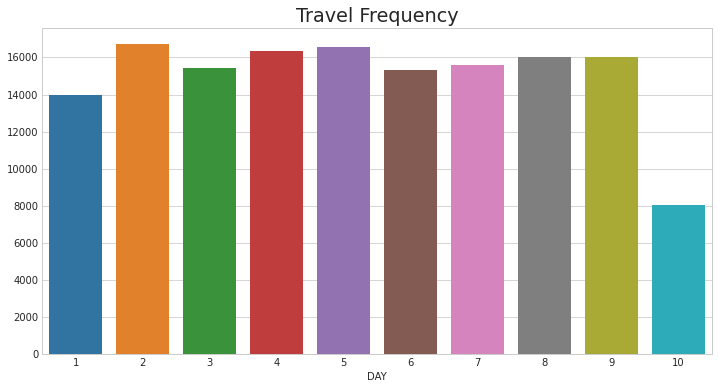

In [ ]:
def plot_bar (group,title):
    plt.figure(figsize=(12,6))
    sns.barplot(x=group.index,y=group.values)
    sns.set(font_scale = 1.6)
    plt.title(title)
    plt.show()

plot_bar(flights_row.value_counts('DAY'), 'Travel Frequency')



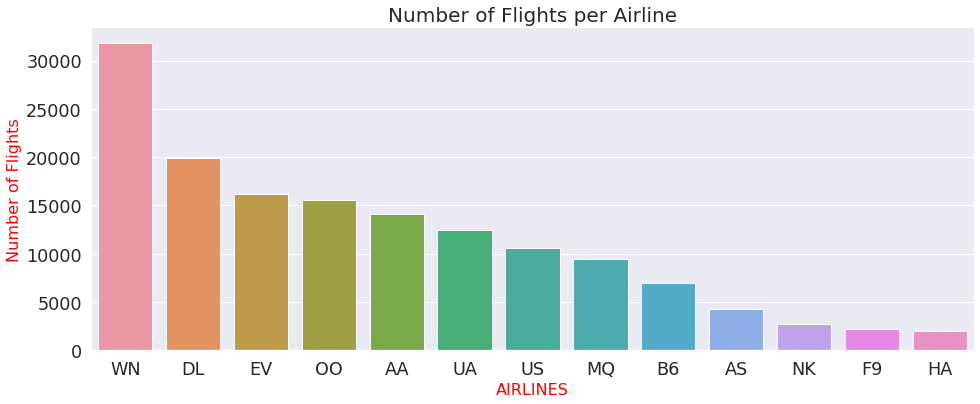

In [ ]:
    plt.figure(figsize=(14,6))   #iloc satır/sütun index numarasıyla erişim
    sns.set(font_scale = 1.6)

    axis = sns.countplot(x=flights_row['AIRLINE'], data = flights_row, order = flights_row['AIRLINE'].value_counts().iloc[0:13].index, orient = "v")         
    plt.title('Number of Flights per Airline', fontsize = 20)
    plt.xlabel('AIRLINES', fontsize = 16, color = 'red')
    plt.ylabel('Number of Flights', fontsize = 16, color = 'red')
    plt.tight_layout()
    plt.show()

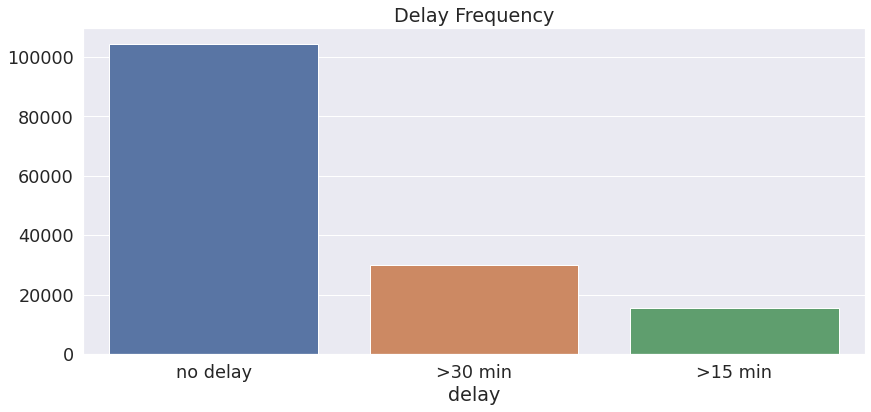

In [ ]:
def plot_bar (group,title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)
    plt.title(title)
    plt.show()

plot_bar(flights_row.value_counts('delay'), 'Delay Frequency')


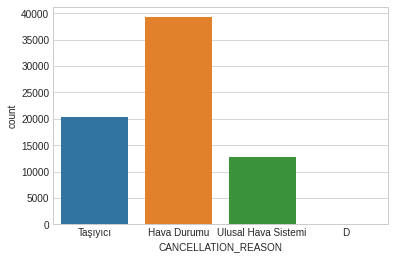

In [ ]:
sns.countplot(flights['CANCELLATION_REASON'])

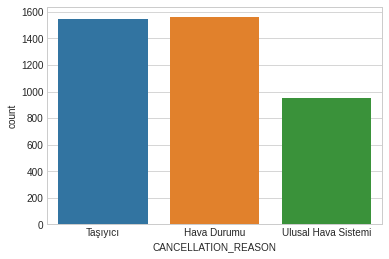

In [ ]:
sns.countplot(flights_row['CANCELLATION_REASON'])

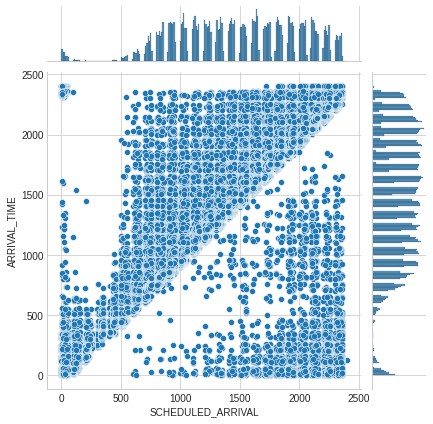

In [ ]:
sns.jointplot(data=flights, x = 'SCHEDULED_ARRIVAL', y = 'ARRIVAL_TIME')

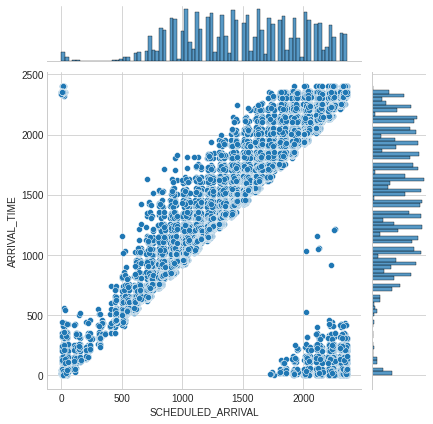

In [ ]:
sns.jointplot(data=flights_row, x = 'SCHEDULED_ARRIVAL', y = 'ARRIVAL_TIME')

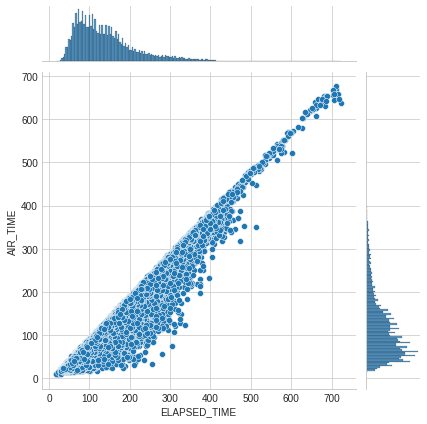

In [ ]:
sns.jointplot(data=flights_row, x = 'ELAPSED_TIME', y = 'AIR_TIME')

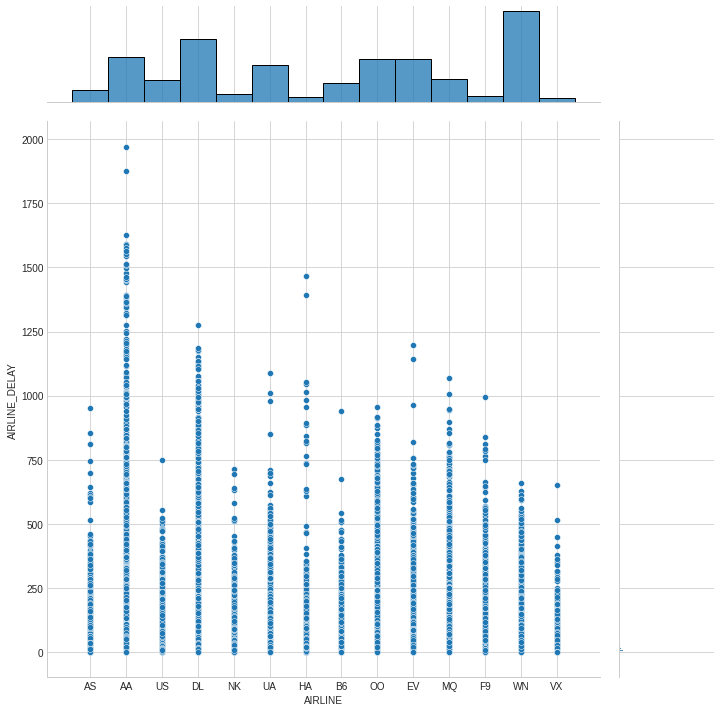

In [ ]:
sns.jointplot(data=flights, x = 'AIRLINE', y = 'AIRLINE_DELAY', height = 10)

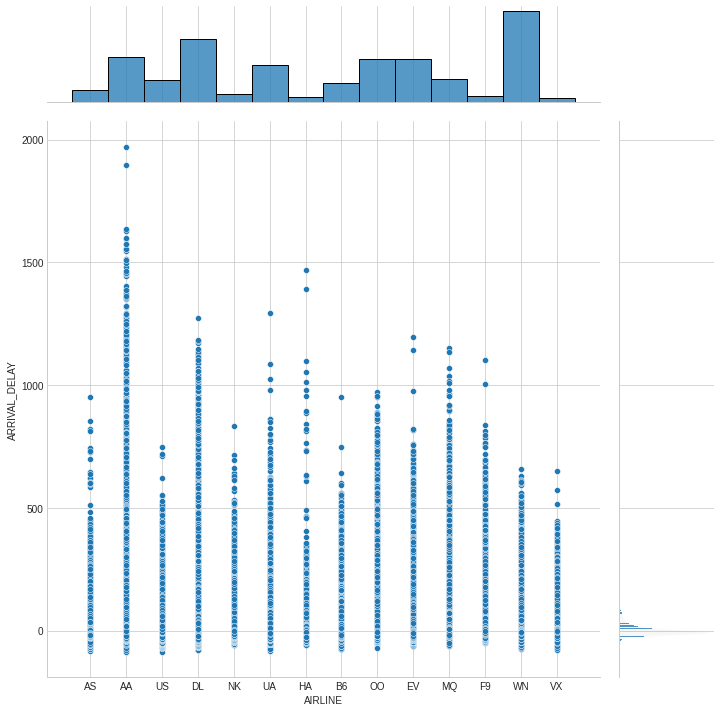

In [ ]:
sns.jointplot(data=flights, x = 'AIRLINE', y = 'ARRIVAL_DELAY', height = 10)

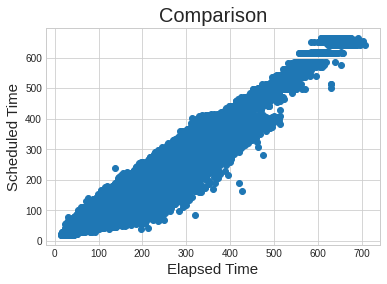

In [ ]:
x = f.ELAPSED_TIME
y = f.SCHEDULED_TIME
r = np.random.randint(0,10)
plt.scatter(x,y)

plt.title("Comparison", fontsize = 20)
plt.xlabel("Elapsed Time", fontsize = 15)
plt.ylabel("Scheduled Time", fontsize = 15)

plt.show()

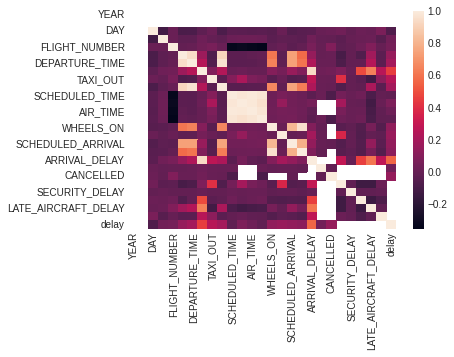

In [ ]:
sns.heatmap(flights_row.corr())

In [ ]:
flights_row = flights_row.drop(['YEAR', 'MONTH', 'DAY', 'FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME',
                                'WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                               axis=1)




In [ ]:
f = f.drop(['YEAR','MONTH','DAY','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME',
                                'WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                               axis=1)

In [ ]:
f1 = f1.drop(['YEAR','MONTH','DAY','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME',
                                'WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                               axis=1)

In [ ]:
flights_row.describe()

,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
count,149870.000000,145969.000000,149870.000000,149870.000000,46796.000000,46796.000000,46796.000000,46796.000000,46796.000000,149870.000000
mean,1314.615594,17.749248,1492.885814,0.002536,13.803423,0.070348,17.167878,25.589473,3.281114,0.486975
std,473.352729,40.944996,490.229923,0.050290,25.597530,1.712754,35.250685,41.299078,18.295743,0.499832
min,5.000000,-42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,917.000000,-3.000000,1115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1310.000000,1.000000,1510.000000,0.000000,3.000000,0.000000,4.000000,9.000000,0.000000,0.000000
75%,1715.000000,22.000000,1908.000000,0.000000,18.000000,0.000000,19.000000,34.000000,0.000000,1.000000
max,2359.000000,419.000000,2359.000000,1.000000,408.000000,107.000000,419.000000,396.000000,402.000000,1.000000


In [ ]:
flights_row.isna().sum()

SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
DIVERTED               0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
DATE                   0
delay                  0
dtype: int64

In [ ]:
len(flights_row['AIRLINE_DELAY'])

149870

In [ ]:
flights_row= flights_row.fillna(flights_row.mean())
   #flights_row= flights_row.fillna("missing, inplace = True")

In [ ]:
f= f.fillna(f.mean())

In [ ]:
f1 = f1.fillna(f1.mean())

In [ ]:
flights_row.columns

Index(['SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'DIVERTED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'delay'],
      dtype='object')

In [ ]:
f.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
1500056,4,6,2254.0,-3.0,2327.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1
1500057,4,6,2254.0,-1.0,629.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1
1500058,4,6,2255.0,-2.0,445.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1
1500059,4,6,2255.0,-10.0,2355.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1
1500060,4,6,2255.0,-7.0,15.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1


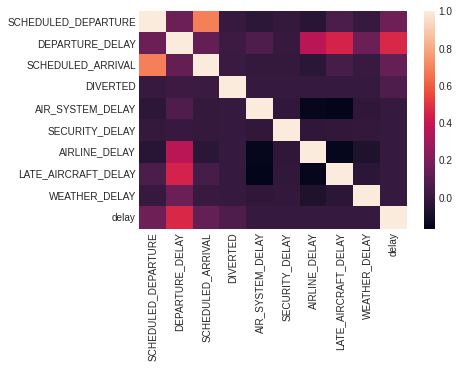

In [ ]:
sns.heatmap(f.corr())

In [ ]:
def plotCorrelationMatrix(f, graphWidth):
    f = f.dropna('columns') # drop columns with NaN
    f = f[[col for col in f if f[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    corr = f.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {f}', fontsize=15)
    plt.show()

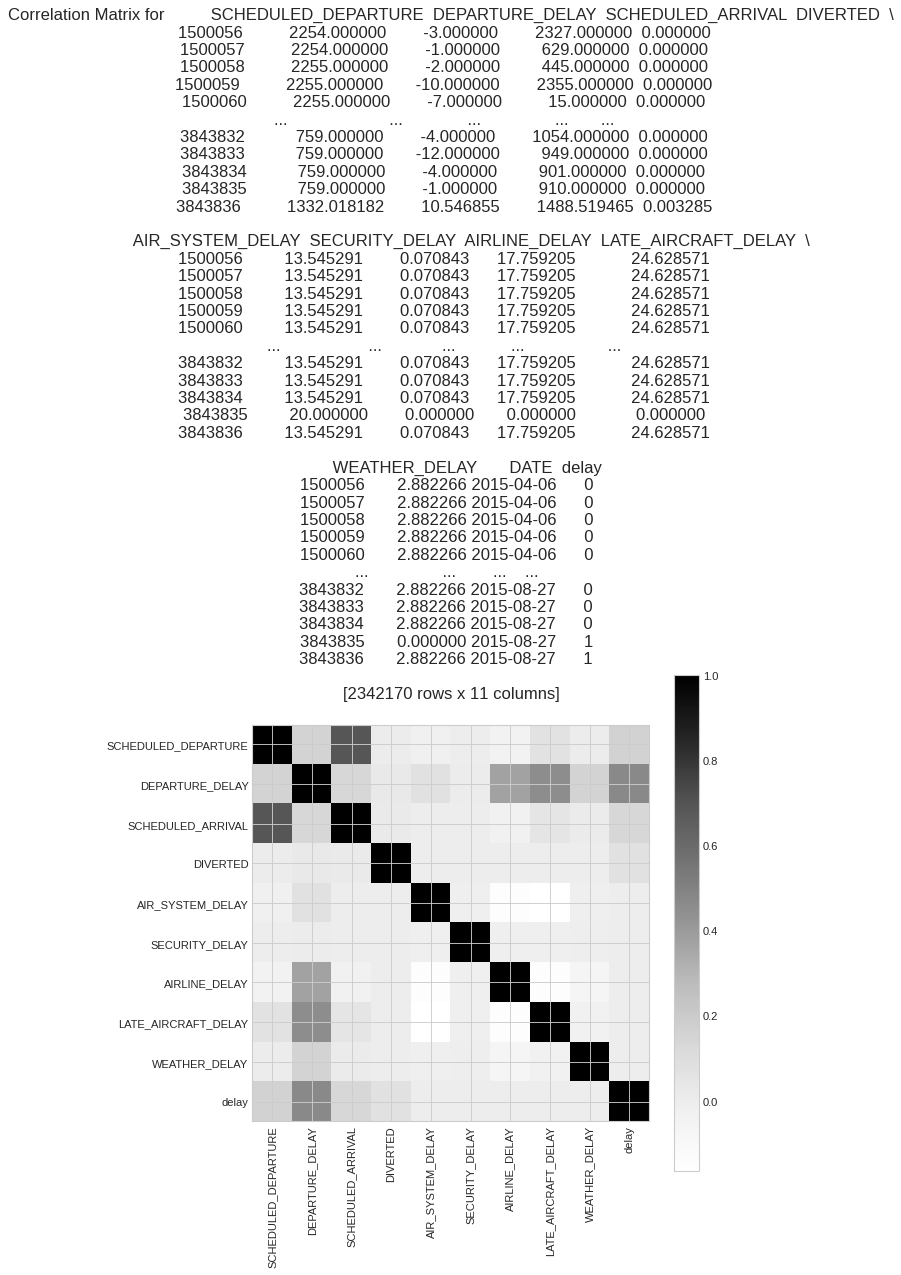

In [ ]:
plotCorrelationMatrix(f,8)

In [ ]:
flights_row[:] = np.nan_to_num(flights_row)

In [ ]:
f.corr()

,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
SCHEDULED_DEPARTURE,1.000000,0.157472,0.688691,4.345050e-03,-2.546421e-02,-4.288989e-03,-4.024283e-02,6.667110e-02,6.377619e-03,1.612260e-01
DEPARTURE_DELAY,0.157472,1.000000,0.133240,2.380865e-02,7.197374e-02,5.942412e-03,3.682792e-01,4.502682e-01,1.560593e-01,4.712616e-01
SCHEDULED_ARRIVAL,0.688691,0.133240,1.000000,1.307282e-02,-1.943688e-03,-3.348868e-03,-3.555133e-02,4.992259e-02,9.312983e-03,1.366506e-01
DIVERTED,0.004345,0.023809,0.013073,1.000000e+00,-8.642021e-17,2.621048e-17,5.982989e-19,1.358114e-16,-1.911627e-18,7.166578e-02
AIR_SYSTEM_DELAY,-0.025464,0.071974,-0.001944,-8.642021e-17,1.000000e+00,-1.088701e-02,-1.496018e-01,-1.651914e-01,-1.893898e-02,-4.002590e-16
SECURITY_DELAY,-0.004289,0.005942,-0.003349,2.621048e-17,-1.088701e-02,1.000000e+00,-1.603296e-02,-1.433168e-02,-6.013189e-03,9.757766e-17
AIRLINE_DELAY,-0.040243,0.368279,-0.035551,5.982989e-19,-1.496018e-01,-1.603296e-02,1.000000e+00,-1.481568e-01,-7.332070e-02,-3.606541e-16
LATE_AIRCRAFT_DELAY,0.066671,0.450268,0.049923,1.358114e-16,-1.651914e-01,-1.433168e-02,-1.481568e-01,1.000000e+00,-2.878764e-02,1.564223e-15
WEATHER_DELAY,0.006378,0.156059,0.009313,-1.911627e-18,-1.893898e-02,-6.013189e-03,-7.332070e-02,-2.878764e-02,1.000000e+00,2.944197e-16
delay,0.161226,0.471262,0.136651,7.166578e-02,-4.002590e-16,9.757766e-17,-3.606541e-16,1.564223e-15,2.944197e-16,1.000000e+00


In [ ]:
f['DATE'] = f['DATE'].apply(pd.Timestamp.timestamp)
f1['DATE'] = f1['DATE'].apply(pd.Timestamp.timestamp)
flights_row['DATE'] = flights_row['DATE'].apply(pd.Timestamp.timestamp)

In [ ]:
#Decision Tree Classifier

In [ ]:
y = flights_row['delay']
X = flights_row.drop(['delay'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [ ]:
cs = DecisionTreeClassifier(criterion="entropy", max_depth=3)
cs = cs.fit(X_train,y_train) # Fit train edilecek veriyi alır.

In [ ]:
cs = DecisionTreeClassifier(criterion="entropy", max_depth=3)
cs = cs.fit(X_train,y_train)

In [ ]:
X_test.shape

(44961, 10)

In [ ]:
p = cs.predict(X_test)

In [ ]:
p.shape

(44961,)

In [ ]:
p = cs.predict(X_test)
print("Accuracy:", roc_auc_score(y_test, p))

Accuracy: 0.8486091795885804


In [ ]:
# AUC,ROC eğrisinin altındaki alan 1'e ne kadar yakınsa model o kadar başarılı. Aynı verisetindeki iki modeli karşılaştırır

In [ ]:
p = cs.predict_proba(X_test)
print("Acc probability:", roc_auc_score(y_test,p[:,1]))

Acc probability: 0.895055211665429


In [ ]:
# Cross Validation
k_folds = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
score = cross_val_score(cs, X, y, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", score)
print("Average CV Score: ", score.mean())
print("Number of CV Scores used in Average: ", len(score))

Cross Validation Scores:  [0.8444652  0.84726763 0.84426503 0.84246347 0.83886035 0.84152933
 0.84253019 0.84319744 0.83712551 0.84313071]
Average CV Score:  0.8424834856875959
Number of CV Scores used in Average:  10


In [ ]:
p[:,1]

array([1.       , 1.       , 1.       , ..., 0.1770397, 1.       ,
       0.1770397])

In [ ]:
p

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
cs_clf = classification_report(y_test, p)

In [ ]:
print("Classification Metrics\n\n", cs_clf)

Classification Metrics

               precision    recall  f1-score   support

           0       0.78      0.92      0.84     20552
           1       0.92      0.78      0.84     24409

    accuracy                           0.84     44961
   macro avg       0.85      0.85      0.84     44961
weighted avg       0.85      0.84      0.84     44961



In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, p, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,18881,1671,20552
1,5406,19003,24409
All,24287,20674,44961


In [ ]:
pd.crosstab(flights_row['DEPARTURE_DELAY'], flights_row['delay'])

delay,0,1
DEPARTURE_DELAY,,
-42.0,1,0
-40.0,1,0
-39.0,1,0
-36.0,1,0
-33.0,1,0
...,...,...
410.0,0,2
412.0,0,1
413.0,0,1


In [ ]:
pd.crosstab(flights_row['WEATHER_DELAY'], flights_row['delay'])

delay,0,1
WEATHER_DELAY,,
0.000000,0,43067
1.000000,0,87
2.000000,0,91
3.000000,0,89
3.281114,68542,34532
...,...,...
354.000000,0,1
371.000000,0,1
388.000000,0,1


In [ ]:
#Random Forest
r_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
r_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
rf_pred = r_forest.predict(X_test)

In [ ]:
r_forest.score(X_test, y_test)

0.8437089922377171

In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,356232,0,356232
1,110888,118423,229311
All,467120,118423,585543


In [ ]:
#Random Forest for f1 multiclass classification
y = f1['delay']
X = f1.drop(['delay'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

r_forest = RandomForestClassifier(n_estimators=100, criterion = 'gini')
r_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
classes = r_forest.classes_

In [ ]:
classes

array([0, 1, 2, 3])

In [ ]:
y_proba = r_forest.predict_proba(X_test)

In [ ]:
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    f1_aux = X_test.copy()
    f1_aux['class'] = [1 if y == c else 0 for y in y_test]
    f1_aux['prob'] = y_proba[:, i]
    f1_aux = f1_aux.reset_index(drop = True)

    roc_auc_ovr[c] = roc_auc_score(f1_aux['class'], f1_aux['prob'])

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0 ROC AUC OvR: 0.9606
1 ROC AUC OvR: 1.0000
2 ROC AUC OvR: 1.0000
3 ROC AUC OvR: 0.9423
average ROC AUC OvR: 0.9757


In [ ]:
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

0.9757085198160778

In [ ]:
f.head()

,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,delay
1500056,2254.0,-3.0,2327.0,0.0,13.545291,0.070843,17.759205,24.628571,2.882266,1.428278e+09,0
1500057,2254.0,-1.0,629.0,0.0,13.545291,0.070843,17.759205,24.628571,2.882266,1.428278e+09,0
1500058,2255.0,-2.0,445.0,0.0,13.545291,0.070843,17.759205,24.628571,2.882266,1.428278e+09,0
1500059,2255.0,-10.0,2355.0,0.0,13.545291,0.070843,17.759205,24.628571,2.882266,1.428278e+09,0
1500060,2255.0,-7.0,15.0,0.0,13.545291,0.070843,17.759205,24.628571,2.882266,1.428278e+09,0


In [ ]:
# AdaBoost and Gradient Classifier

In [ ]:
y = f['delay']
X = f.drop(['delay'], axis = 1) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
ada_clf = AdaBoostClassifier(random_state = 42)
grd_clf = GradientBoostingClassifier(random_state = 42)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
grd_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
ada_train_pred = ada_clf.predict(X_train)
ada_test_pred = ada_clf.predict(X_test)

# GradientBoosting model predictions
grd_train_pred = grd_clf.predict(X_train)
grd_test_pred = grd_clf.predict(X_test)

In [ ]:
# Display
def display_acc(true, preds, model_name):
    acc = accuracy_score(true, preds)
  
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    
print("Training Metrics\n")
display_acc(y_train, ada_train_pred, model_name='AdaBoost')
print("")
display_acc(y_train, grd_train_pred, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics\n")
display_acc(y_test, ada_test_pred, model_name='AdaBoost')
print("")
display_acc(y_test, grd_test_pred, model_name='Gradient Boosted Trees')

Training Metrics

Model: AdaBoost
Accuracy: 0.8568609044492655

Model: Gradient Boosted Trees
Accuracy: 0.8576533322099683

Testing Metrics

Model: AdaBoost
Accuracy: 0.8567671375116772

Model: Gradient Boosted Trees
Accuracy: 0.8575305314895746


In [ ]:
ada_report = classification_report(y_test, ada_test_pred)
grd_report = classification_report(y_test, grd_test_pred)

In [ ]:
print("Adaboost Classification Report\n\n", ada_report, '\n')
print("Gradient Boosting Classification Report\n\n", grd_report)

Adaboost Classification Report

               precision    recall  f1-score   support

           0       0.84      0.95      0.89    356232
           1       0.91      0.71      0.79    229311

    accuracy                           0.86    585543
   macro avg       0.87      0.83      0.84    585543
weighted avg       0.86      0.86      0.85    585543
 

Gradient Boosting Classification Report

               precision    recall  f1-score   support

           0       0.83      0.96      0.89    356232
           1       0.91      0.70      0.79    229311

    accuracy                           0.86    585543
   macro avg       0.87      0.83      0.84    585543
weighted avg       0.86      0.86      0.85    585543



In [ ]:
print('Adaboost Confusion Matrix\n')
pd.crosstab(y_test, ada_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Adaboost Confusion Matrix



Predicted,0,1,All
True,,,
0,339297,16935,356232
1,66934,162377,229311
All,406231,179312,585543


In [ ]:
print('Gradient Boosting Confusion Matrix\n')
pd.crosstab(y_test, grd_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Gradient Boosting Confusion Matrix



Predicted,0,1,All
True,,,
0,340717,15515,356232
1,67907,161404,229311
All,408624,176919,585543


In [ ]:
print('Mean Adaboost CrossVal Score')
print(cross_val_score(ada_clf, X, y, cv=10).mean())

Mean Adaboost CrossVal Score
0.8342353458544853


In [ ]:
print('Mean Gradient CrossVal Score')
print(cross_val_score(grd_clf, X, y, cv = 10).mean())

Mean Gradient CrossVal Score
0.7260497743545515


In [ ]:
y = f['delay']
X = f.drop(['delay'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_p = xgb.predict(X_test)
preds = [round(value) for value in y_p]
# evaluate predictions
acc = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 85.72%


In [ ]:
report = classification_report(y_test, y_p)
print("Classification Report\n\n", report)

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.96      0.89    356232
           1       0.91      0.70      0.79    229311

    accuracy                           0.86    585543
   macro avg       0.87      0.83      0.84    585543
weighted avg       0.86      0.86      0.85    585543



In [ ]:
print('XGboost Confusion Matrix\n')
pd.crosstab(y_test, y_p, rownames=['True'], colnames=['Predicted'], margins=True)

XGboost Confusion Matrix



Predicted,0,1,All
True,,,
0,341060,15172,356232
1,68467,160844,229311
All,409527,176016,585543


In [ ]:
from xgboost.compat import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [ ]:
score = cross_val_score(xgb, X, y, cv = k_folds)

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
print(xgb.feature_importances_)
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)

In [ ]:
y = f1['delay']
X = f1.drop(['delay'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

0.8447439631844741


In [ ]:
print('KNN Confusion Matrix\n')
pd.crosstab(y_test, knn_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Confusion Matrix



Predicted,0,1,2,3,All
True,,,,,
0,121685,1,15,3340,125041
1,59,44762,1130,491,46442
2,392,6220,32684,816,40112
3,20893,6391,5291,45925,78500
All,143029,57374,39120,50572,290095


In [ ]:
report = classification_report(y_test, knn_predictions)
print("Classification Report:\n\n", report)

Classification Report:

               precision    recall  f1-score   support

         0.0       0.87      0.75      0.81     18610
         1.0       0.78      0.89      0.83     18858

    accuracy                           0.82     37468
   macro avg       0.83      0.82      0.82     37468
weighted avg       0.83      0.82      0.82     37468



In [ ]:
# MODELS WITHOUT DEP_DELAY
y = f['delay']
X = f.drop(['delay', 'DEPARTURE_DELAY'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [ ]:
cs = DecisionTreeClassifier(criterion="entropy", max_depth=3)
cs = cs.fit(X_train,y_train) # Fit train edilecek veriyi alır.

In [ ]:
p = cs.predict(X_test)
print("Accuracy:", roc_auc_score(y_test, p))

Accuracy: 0.7574385877694485


In [ ]:
p = cs.predict_proba(X_test)
print("Acc probability:", roc_auc_score(y_test,p[:,1]))

Acc probability: 0.7773574990680587


In [ ]:
# Cross Validation
k_folds = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
score = cross_val_score(cs, X, y, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", score)
print("Average CV Score: ", score.mean())
print("Number of CV Scores used in Average: ", len(score))

Cross Validation Scores:  [0.80967223 0.80956976 0.81043221 0.81034682 0.80970211 0.80980031
 0.81014615 0.81041513 0.80864327 0.81043648]
Average CV Score:  0.8099164450061268
Number of CV Scores used in Average:  10


In [ ]:
cs_clf = classification_report(y_test, p)

In [ ]:
print("Classification Metrics\n\n", cs_clf)

Classification Metrics

               precision    recall  f1-score   support

           0       0.76      1.00      0.86    356232
           1       1.00      0.51      0.68    229311

    accuracy                           0.81    585543
   macro avg       0.88      0.76      0.77    585543
weighted avg       0.86      0.81      0.79    585543



In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, p, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,356232,0,356232
1,111244,118067,229311
All,467476,118067,585543


In [ ]:
cs.feature_importances_

array([0.00924175, 0.        , 0.02011797, 0.        , 0.97064028,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
pd.crosstab(flights_row['AIR_SYSTEM_DELAY'], flights_row['delay'])

delay,0,1
AIR_SYSTEM_DELAY,,
0.0,0,20010
1.0,0,1154
2.0,0,1153
3.0,0,1098
4.0,0,1035
...,...,...
377.0,0,1
379.0,0,1
384.0,0,2


In [ ]:
#Random Forest
r_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
r_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
r_forest.score(X_test, y_test)

0.8106236433532635

In [ ]:
rf_pred = r_forest.predict(X_test)

In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,356232,0,356232
1,110888,118423,229311
All,467120,118423,585543


In [ ]:
#Adaboost and Gradient Boosting Models
ada_clf = AdaBoostClassifier(random_state = 42)
grd_clf = GradientBoostingClassifier(random_state = 42)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
grd_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
ada_train_pred = ada_clf.predict(X_train)
ada_test_pred = ada_clf.predict(X_test)

# GradientBoosting model predictions
grd_train_pred = grd_clf.predict(X_train)
grd_test_pred = grd_clf.predict(X_test)

In [ ]:
# Display
def display_acc(true, preds, model_name):
    acc = accuracy_score(true, preds)
  
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    
print("Training Metrics\n")
display_acc(y_train, ada_train_pred, model_name='AdaBoost')
print("")
display_acc(y_train, grd_train_pred, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics\n")
display_acc(y_test, ada_test_pred, model_name='AdaBoost')
print("")
display_acc(y_test, grd_test_pred, model_name='Gradient Boosted Trees')

ada_report = classification_report(y_test, ada_test_pred)
grd_report = classification_report(y_test, grd_test_pred)

Training Metrics

Model: AdaBoost
Accuracy: 0.8104970491743552

Model: Gradient Boosted Trees
Accuracy: 0.8104970491743552

Testing Metrics

Model: AdaBoost
Accuracy: 0.8106236433532635

Model: Gradient Boosted Trees
Accuracy: 0.8106236433532635


In [ ]:
print("Adaboost Classification Report\n\n", ada_report, '\n')
print("Gradient Boosting Classification Report\n\n", grd_report)

Adaboost Classification Report

               precision    recall  f1-score   support

           0       0.76      1.00      0.87    356232
           1       1.00      0.52      0.68    229311

    accuracy                           0.81    585543
   macro avg       0.88      0.76      0.77    585543
weighted avg       0.86      0.81      0.79    585543
 

Gradient Boosting Classification Report

               precision    recall  f1-score   support

           0       0.76      1.00      0.87    356232
           1       1.00      0.52      0.68    229311

    accuracy                           0.81    585543
   macro avg       0.88      0.76      0.77    585543
weighted avg       0.86      0.81      0.79    585543



In [ ]:
ada_report = classification_report(y_test, ada_test_pred)
grd_report = classification_report(y_test, grd_test_pred)

In [ ]:
print('Adaboost Confusion Matrix\n')
pd.crosstab(y_test, ada_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Adaboost Confusion Matrix



Predicted,0,1,All
True,,,
0,356232,0,356232
1,110888,118423,229311
All,467120,118423,585543


In [ ]:
print('Gradient Boosting Confusion Matrix\n')
pd.crosstab(y_test, grd_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Gradient Boosting Confusion Matrix



Predicted,0,1,All
True,,,
0,356232,0,356232
1,110888,118423,229311
All,467120,118423,585543


In [ ]:
y = f1['delay']
X = f1.drop(['delay', 'DEPARTURE_DELAY'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

0.6446681259587377


In [ ]:
print('KNN Confusion Matrix\n')
pd.crosstab(y_test, knn_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Confusion Matrix



Predicted,0,1,2,3,All
True,,,,,
0,119447,1126,619,3849,125041
1,14637,26725,3082,1998,46442
2,15504,10052,11741,2815,40112
3,33806,5942,9650,29102,78500
All,183394,43845,25092,37764,290095


In [ ]:
flights_row['DATE'] = pd.to_numeric(pd.to_datetime(flights_row['DATE']))

In [ ]:
flights_row.head()

,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,delay
0,5.0,-11.0,430.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1420070400,1
1,10.0,-8.0,750.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1420070400,1
2,20.0,-2.0,806.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1420070400,0
3,20.0,-5.0,805.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1420070400,1
4,25.0,-1.0,320.0,0.0,13.803423,0.070348,17.167878,25.589473,3.281114,1420070400,1
